In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import style
from numpy import genfromtxt
from scipy.stats import multivariate_normal

import pandas as pd
np.random.seed(0)
# To remove warning while plotting
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [2]:

# print(X0, X1, X2)
# print(X_tot)
X = genfromtxt('data_with_y.csv',delimiter=',')
  
# turn it into a dataframe 
d = pd.DataFrame(X)


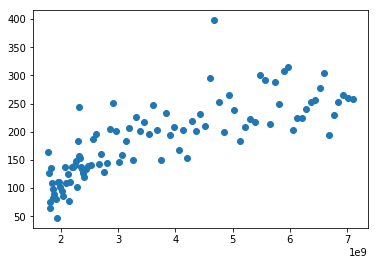

array([40.815  , 31.84   , 18.7405 , 16.032  , 33.7975 , 27.29   ,
       20.633  , 24.5565 , 22.50675, 20.3765 , 11.798  , 27.865  ,
       27.9275 , 25.3875 , 23.8225 , 21.3885 , 34.565  , 27.225  ,
       31.2475 , 19.1905 , 27.9275 , 34.1725 , 34.43   , 35.2975 ,
       36.915  , 25.3275 , 45.725  , 60.97   , 39.225  , 38.49   ,
       34.255  , 33.47   , 31.5525 , 29.895  , 33.515  , 35.0125 ,
       35.285  , 46.735  , 48.8125 , 35.5375 , 40.2125 , 32.105  ,
       36.27   , 51.0775 , 62.8075 , 50.275  , 36.7275 , 39.8175 ,
       45.7475 , 51.8    , 37.315  , 56.3825 , 50.4525 , 54.3775 ,
       49.0425 , 61.8275 , 51.     , 37.7    , 58.3    , 48.345  ,
       52.21   , 41.8675 , 50.995  , 38.2375 , 54.9425 , 50.47   ,
       57.8725 , 52.635  , 73.9625 , 99.455  , 63.085  , 49.77   ,
       66.17   , 59.615  , 45.925  , 51.93   , 55.815  , 54.32   ,
       75.3475 , 73.0625 , 53.3575 , 71.8525 , 62.2575 , 77.06   ,
       78.65   , 50.7325 , 56.22   , 56.3    , 60.18   , 63.25

In [3]:
plt.scatter(d[1],d[5])
plt.show()
#X_tot = np.hstack((d[1],d[3])).flatten()
#d[3]
X_tot=np.hstack((d[5]/4)).flatten()
X_tot

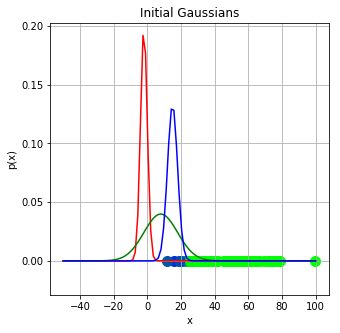

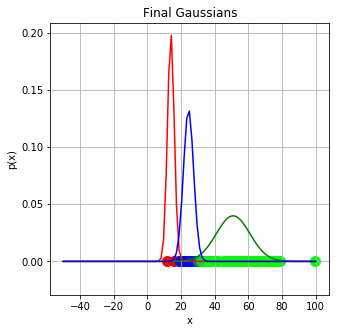

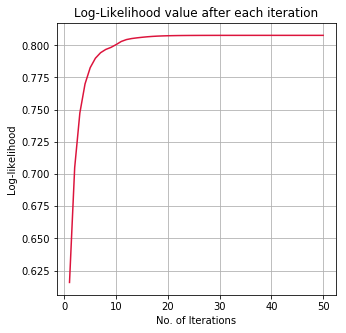

In [7]:
rajvi=99 
llimit=-50
rlimit=100
class GMM:
    def __init__(self,X,iterations):
        self.iterations = iterations
        self.X = X
        self.mu = None
        self.pi = None
        self.var = None
    def run(self):
        # Initializstion of mean, mixture weights and variation
        self.mu = [-2,8,15]
        self.pi = [1/3,1/3,1/3]
        self.var = [2,10,3]
        # No. of gaussians
        
        K = 3;
        
        # Initializtion of gaussians
        gauss_1 = norm(loc=self.mu[0],scale=self.var[0])
        gauss_2 = norm(loc=self.mu[1],scale=self.var[1])
        gauss_3 = norm(loc=self.mu[2],scale=self.var[2])
        
        # For calculating log_likelihoods
        log_likelihoods=[]
        l=[]
        
        # E-Step
        for iter in range(self.iterations):
            # Create responsibility with (nxK)
            r = np.zeros((len(X_tot),K))
            # Probability for each datapoint x_n to belong to gaussian g
            for k,g,p in zip(range(K),[gauss_1, gauss_2, gauss_3],self.pi):
                r[:,k] = p*g.pdf(X_tot)
            
            for n in range(len(r)):
                r[n] = r[n]/(np.sum(self.pi)*np.sum(r,axis=1)[n])
       
            if(iter==0 or iter==self.iterations-1):
                fig = plt.figure(figsize=(5,5))
                ax0 = fig.add_subplot(111)
                ax0.set_xlabel('x')
                ax0.set_ylabel('p(x)')
                if(iter==0):
                    ax0.set_title('Initial Gaussians')
                else:
                    ax0.set_title('Final Gaussians')
                for n in range(len(r)):
                    ax0.scatter(self.X[n],0,c=np.array([r[n][0],r[n][1],r[n][2]]),s=100)
    
                # Plot the gaussians
                for g,c in zip([gauss_1.pdf(np.linspace(llimit,rlimit,num=rajvi)),gauss_2.pdf(np.linspace(llimit,rlimit,num=rajvi)),gauss_3.pdf(np.linspace(llimit,rlimit,num=rajvi))],['r','g','b']):
                    ax0.plot(np.linspace(llimit,rlimit,num=rajvi),g,c=c)
                    plt.grid()
                    
            n_k = []
            for k in range(K):
                nk = np.sum(r[:,k])
                n_k.append(nk)
                    
            for k in range(K):
                self.pi[k] = (n_k[k]/np.sum(n_k))                    
            
            self.mu = np.sum(self.X.reshape(len(self.X),1)*r,axis=0)/n_k
                
            var_k = []
            for k in range(K):
                var_k.append((1/n_k[k])*np.dot(((np.array(r[:,k]).reshape(rajvi,1))*(self.X.reshape(len(self.X),1)-self.mu[k])).T,(self.X.reshape(len(self.X),1)-self.mu[k])))

                # Update the gaussian
            gauss_1 = norm(loc=self.mu[0],scale=self.var[0])
            gauss_2 = norm(loc=self.mu[1],scale=self.var[1])
            gauss_3 = norm(loc=self.mu[2],scale=self.var[2])

            plt.show()
            log_likelihoods.append(np.log(np.sum([p*multivariate_normal(self.mu[i],self.var[j]).pdf(self.X) for p,i,j in zip(self.pi,range(len(self.mu)),range(len(self.var)))])))
             
                
        fig2 = plt.figure(figsize=(5,5))
        ax1 = fig2.add_subplot(111)
        ax1.set_title('Log-Likelihood value after each iteration')
        ax1.set_xlabel('No. of Iterations')
        ax1.set_ylabel('Log-likelihood')
        ax1.plot(range(1,self.iterations+1,1),log_likelihoods,'crimson')
        plt.grid()

GMM = GMM(X_tot,50)
GMM.run()


